In [151]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
from dataset import DataSet
import pandas as pd
%load_ext autoreload
np.random.seed(2) 
torch.manual_seed(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
%autoreload


In [175]:
lcs = utils.get_data('../../datasets/ZTF_g', split=0.02)


validated 3408 files out of 3408 for band='g'
created union_tp attribute of length 3500
dataset created w/ shape (2559, 1, 1974, 3)
train size: 51, valid size: 50, test size: 2508


In [302]:
net1, optimizer, args, epoch1, loss, train_loss1, test_loss1 = utils.load_checkpoint('../checkpoints/final/ZTF_g1.0637503862380981.h5', lcs.data_obj)
net2, optimizer, args, epoch2, loss, train_loss2, test_loss2 = utils.load_checkpoint('../checkpoints/final/ZTF_g0.8920086026191711.h5', lcs.data_obj)
net3, optimizer, args, epoch3, loss, train_loss3, test_loss3 = utils.load_checkpoint('../checkpoints/final/ZTF_g0.668415367603302.h5', lcs.data_obj)


=> loading checkpoint '../checkpoints/final/ZTF_g1.0637503862380981.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_g', checkpoint='', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=20000, frac=0.5, batch_size=2, mse_weight=5.0, dropout=0.0, num_resamples=0, lr=0.0002, scheduler=False, warmup=4000, kl_zero=False, kl_annealing=True, net='hetvae', device='mps', const_var=False, var_per_dim=False, std=0.1, seed=2, save=True, k_iwae=1)
=> loading checkpoint '../checkpoints/final/ZTF_g0.8920086026191711.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_g', checkpoint='datasets/ZTF_g0.9750720858573914.h5', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=200

In [303]:
lcs.set_target_x(n=100)

In [305]:
recon_info1 = utils.predict(lcs.data_obj['train_loader'], net1,target_x=lcs.target_x, frac=1.0,k_iwae=10)
recon_info2 = utils.predict(lcs.data_obj['train_loader'], net2,target_x=lcs.target_x, frac=1.0,k_iwae=10)
recon_info3 = utils.predict(lcs.data_obj['train_loader'], net3,target_x=lcs.target_x, frac=1.0,k_iwae=10)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:12<00:00,  2.01it/s]


In [306]:
recon_info = recon_info1

recons = recon_info['recons']
examples = recon_info['examples']
# input light curves
tp = examples['tp']
# unsubsampled y
y = examples['target']
## subsampled y (if it is at all)
inputs = examples['inputs']
sub_mask = examples['mask']
## preds 
pred_mean = recons['pred_mean']
pred_std = recons['pred_std']
pred_tp = recons['target_tp']

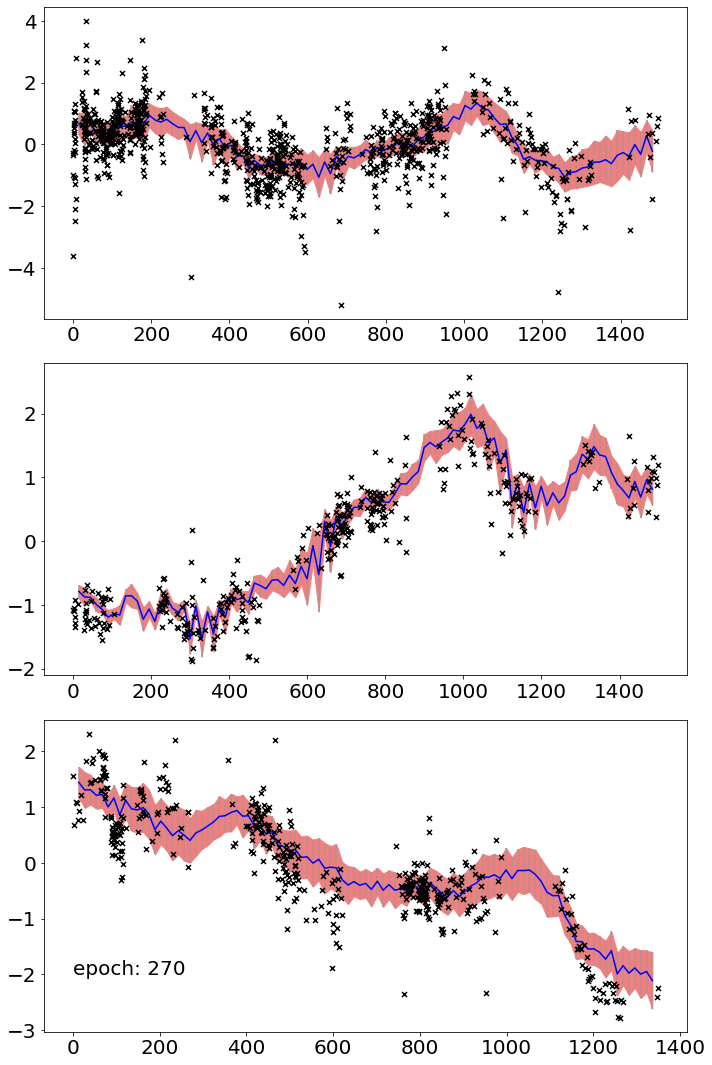

In [307]:
figsize=(10,15)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
n=3
dims = pred_mean.shape[2]
fig,ax = plt.subplots(n,dims,figsize=figsize, squeeze=False)
fig.tight_layout()

for ex in range(n):
    #ax[ex,0].set_title(lcs.valid_files_df.index[ex],fontsize=20)
    input_i = inputs[ex].nonzero()[0]  
    pred_i = pred_tp[ex].nonzero()[0]
    
    for band in range(dims):
        ### inputs 
        ax[ex,band].scatter(tp[ex,input_i], inputs[ex,input_i,band], c='black', marker='x', zorder=30, label='light curve', s=25)
        ## preds for all target timepoints
        std = pred_std[ex,pred_i,band]
        ax[ex,band].fill_between(pred_tp[ex,pred_i],pred_mean[ex,pred_i,band]-std ,pred_mean[ex,pred_i,band]+std, label='error envelope',color='lightcoral')
        ax[ex,band].errorbar(pred_tp[ex, pred_i],pred_mean[ex,pred_i,band],yerr=std,c='rosybrown',)
        ax[ex,band].plot(pred_tp[ex, pred_i],pred_mean[ex,pred_i,band],label='pred mean',c='blue',zorder=20)

ax[n-1,0].text(0,-2,f'epoch: {epoch1}',fontsize=20)        
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#fig.legend(by_label.values(), by_label.keys(),fontsize=15)
#fig.suptitle('Self-supervised training process',fontsize=25,x=0.2,y=1.03)
fig.savefig('../img/train1',bbox_inches='tight')

In [308]:
recon_info = recon_info2
recons = recon_info['recons']
examples = recon_info['examples']
# input light curves
tp = examples['tp']
# unsubsampled y
y = examples['target']
## subsampled y (if it is at all)
inputs = examples['inputs']
sub_mask = examples['mask']
## preds 
pred_mean = recons['pred_mean']
pred_std = recons['pred_std']
pred_tp = recons['target_tp']

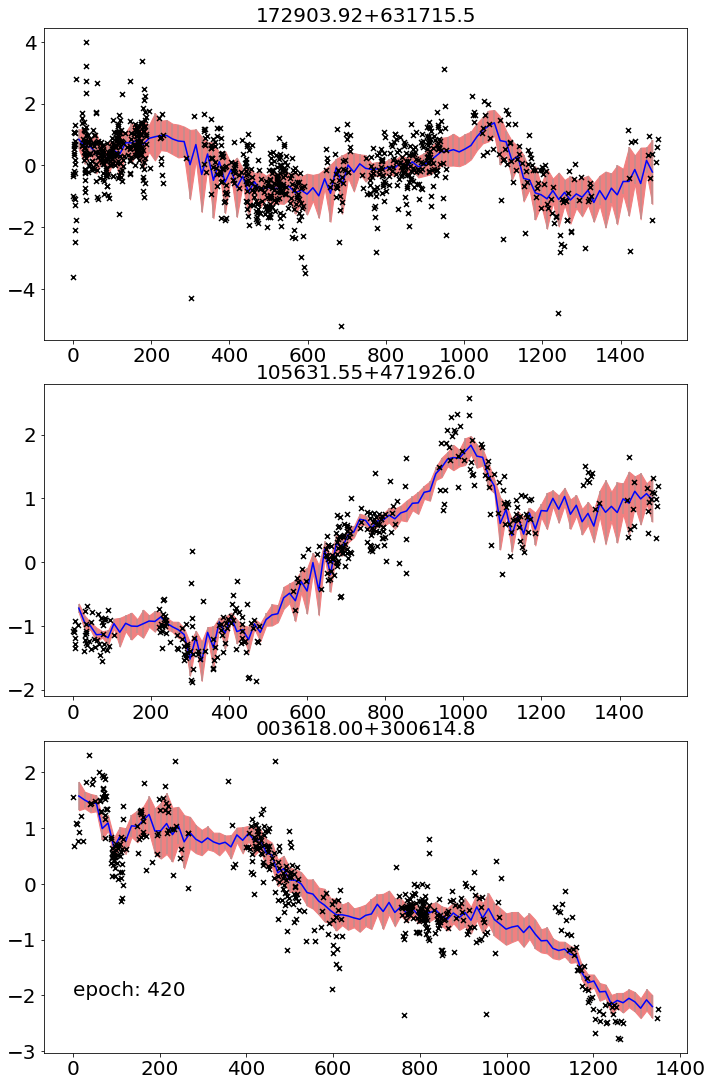

In [309]:
figsize=(10,15)
n=3

dims = pred_mean.shape[2]
fig,ax = plt.subplots(n,dims,figsize=figsize, squeeze=False)
fig.tight_layout()

for ex in range(n):
    ax[ex,0].set_title(lcs.valid_files_df.index[ex],fontsize=20)
    input_i = inputs[ex].nonzero()[0]  
    pred_i = pred_tp[ex].nonzero()[0]
    
    for band in range(dims):
        ### inputs 
        ax[ex,band].scatter(tp[ex,input_i], inputs[ex,input_i,band], c='black', marker='x', zorder=30, label='light curve', s=25)
        ## preds for all target timepoints
        std = pred_std[ex,pred_i,band]
        ax[ex,band].fill_between(pred_tp[ex,pred_i],pred_mean[ex,pred_i,band]-std ,pred_mean[ex,pred_i,band]+std, label='error envelope',color='lightcoral')
        ax[ex,band].errorbar(pred_tp[ex, pred_i],pred_mean[ex,pred_i,band],yerr=std,c='rosybrown',)
        ax[ex,band].plot(pred_tp[ex, pred_i],pred_mean[ex,pred_i,band],label='pred mean',c='blue',zorder=20)
        
ax[n-1,0].text(0,-2,f'epoch: {epoch2}',fontsize=20)
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#fig.legend(by_label.values(), by_label.keys(),fontsize=15)
#fig.suptitle('Self-supervised training process',fontsize=25,x=0.2,y=1.03)
fig.savefig('../img/train2',bbox_inches='tight')

In [310]:
recon_info = recon_info3
recons = recon_info['recons']
examples = recon_info['examples']
# input light curves
tp = examples['tp']
# unsubsampled y
y = examples['target']
## subsampled y (if it is at all)
inputs = examples['inputs']
sub_mask = examples['mask']
## preds 
pred_mean = recons['pred_mean']
pred_std = recons['pred_std']
pred_tp = recons['target_tp']

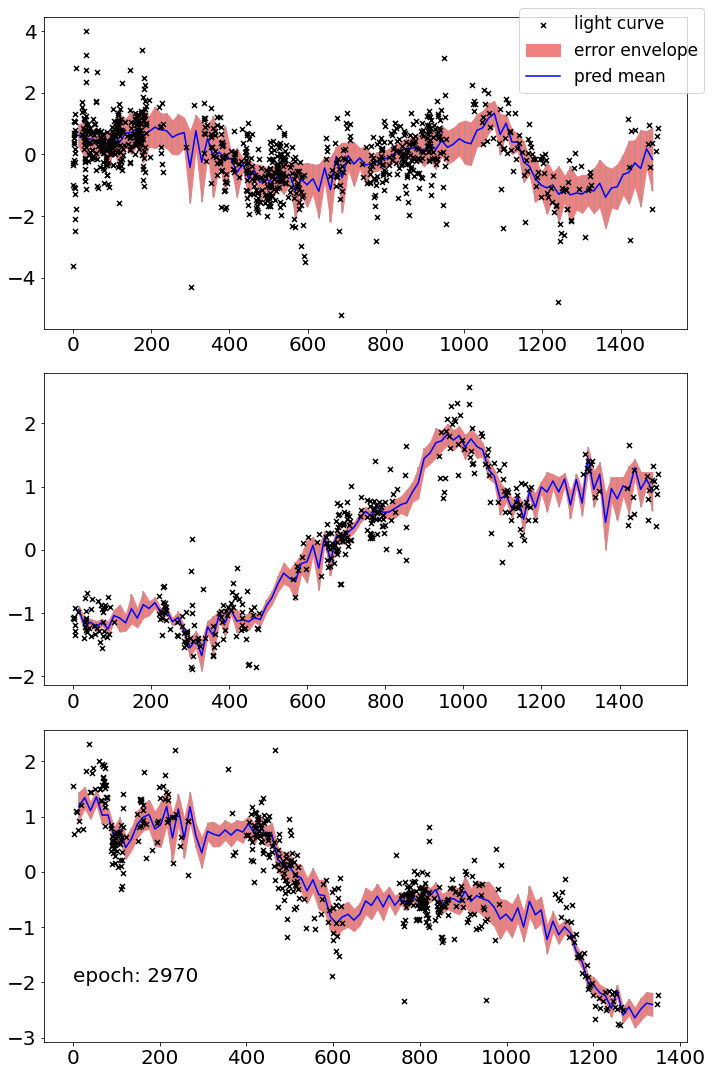

In [311]:
figsize=(10,15)
n=3
dims = pred_mean.shape[2]
fig,ax = plt.subplots(n,dims,figsize=figsize, squeeze=False)
fig.tight_layout()

for ex in range(n):
    #ax[ex,0].set_title(lcs.valid_files_df.index[ex],fontsize=20)
    input_i = inputs[ex].nonzero()[0]  
    pred_i = pred_tp[ex].nonzero()[0]
    
    for band in range(dims):
        ### inputs 
        ax[ex,band].scatter(tp[ex,input_i], inputs[ex,input_i,band], c='black', marker='x', zorder=30, label='light curve', s=25)
        ## preds for all target timepoints
        std = pred_std[ex,pred_i,band]
        ax[ex,band].fill_between(pred_tp[ex,pred_i],pred_mean[ex,pred_i,band]-std ,pred_mean[ex,pred_i,band]+std, label='error envelope',color='lightcoral')
        ax[ex,band].errorbar(pred_tp[ex, pred_i],pred_mean[ex,pred_i,band],yerr=std,c='rosybrown',)
        ax[ex,band].plot(pred_tp[ex, pred_i],pred_mean[ex,pred_i,band],label='pred mean',c='blue',zorder=20)
        
ax[n-1,0].text(0,-2,f'epoch: {epoch3}',fontsize=20)
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),fontsize=17)
#fig.suptitle('Self-supervised training process',fontsize=25,x=0.2,y=1.03)
fig.savefig('../img/train3',bbox_inches='tight')